In [5]:
#from sotodlib import core
import numpy as np
import so3g
from scipy.optimize import curve_fit
import ephem
from datetime import datetime
from so3g.proj import coords, quat
from astropy.table import Table
import re, os, pickle
import matplotlib.pyplot as plt


In [6]:
def load_beam_txt(filename):
    meta = {}
    mode = 'preamble'
    data = []
    for line in open(filename, 'rb'):
        line = line.decode('latin_1')
        #print(mode)
        if mode == 'preamble':
            if (line.strip() == 'HUYGENS PSF'):
                mode = 'header'

        elif mode == 'header':
            if line.strip() == '':
                mode = 'data'
            for regstr, key, nelem, cast in [
                    ('(.*) .m at (.*), (.*) mm', 'params', 3, float),
                    ('Data spacing is (.*) deg.', 'spacing', 1, float),
                    ]:
                m = re.search(regstr, line)
                if m is not None:
                    vals = [cast(m.group(i+1)) for i in range(nelem)]
                    if len(vals) == 1:
                        vals = vals[0]
                    meta[key] = vals

        elif mode == 'data':
            w = line.split()
            data.append(list(map(float, w)))

    data = np.array(data)
    return data, meta


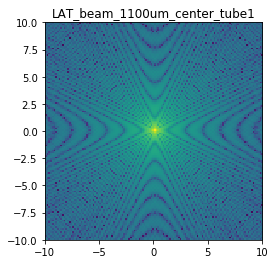

In [7]:
#name = 'LAT_beam_1100um_center_tube1'
#path = '/home/jorlo/dev/gaussian_beams/'

#data, meta = load_beam_txt(path+name+'.TXT')

p_name = 'LAT_beam_270GHz_center_tube' 
p_path = '/home/jorlo/dev/pwg-scripts/pwg-bcp/2020_03_06_LAT_UHF_Beams/'
p = pickle.load(open(p_path + p_name + '.p', 'rb'))

data = p['data']

plt.imshow(np.log(p['data']), extent = [-10, 10, -10, 10])
plt.title(name)
plt.savefig('../plots/' + name + "_beam.pdf")
plt.show()

In [73]:
#Function due to polarbear
def binmap(map2d, x, y, rbin):

    '''Bin a 2d map into a 1d symmteric radial profile (i.e. for B_l or radial profile)'''
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2+Y**2)
    d = np.digitize(R.flatten(), rbin)
    rbin1d = np.zeros(len(rbin))
    bin1d = np.zeros(len(rbin))
    binvar = np.zeros(len(rbin))
    binerr = np.zeros(len(rbin))
    for i in range (len(rbin)):
        rbin1d[i] = np.mean(R.flatten()[d==i+1])
        bin1d[i] = np.mean(map2d.flatten()[d==i+1])
        binvar[i] = np.var(map2d.flatten()[d==i+1])
        binerr[i] = np.sqrt(np.var(map2d.flatten()[d==i]) / len(map2d.flatten()[d==i+1]))
    return  rbin1d, bin1d, binvar, binerr

In [100]:
length = p['size'][1][0]
x, y , rbin = np.linspace(-length/2,length/2, length), np.linspace(-length/2,length/2, length), np.linspace(0,np.sqrt(2)*length/2, length/2)
r, bin_data, c, d = binmap(data,x,y,rbin)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[  0.71267455   2.09287408   3.46324614   5.1226064    6.66798125
   8.01009933   9.3898918   10.75614133  12.21414     13.70982964
  15.11192219  16.56258132  18.0087395   19.40535146  20.85710764
  22.32336437  23.75384526  25.16766142  26.60095121  28.07952175
  29.52431733  30.92587378  32.33644465  33.75981233  35.21310579
  36.67513979  38.08845962  39.52819381  40.96401462  42.39378562
  43.85481688  45.28871832  46.70920634  48.12611951  49.54970367
  51.01542266  52.46864886  53.88526181  55.30511239  56.73830665
  58.17428823  59.62953606  61.07634129  62.50561916  63.91892966
  65.32377543  66.80142856  68.22340588  69.64377393  71.0697003
  72.47774615  73.92363953  75.3718477   76.81978643  78.24048957
  79.6368373   81.05926371  82.45989202  83.83342585  85.2152136
  86.60362908  87.99497204  89.37508075  90.50966799]


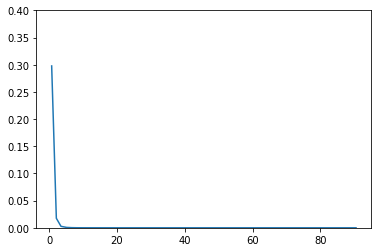

[0]
64


In [101]:
print(r)

plt.plot(r, bin_data)
plt.ylim(0,0.4)
plt.savefig('test_radial_bin.pdf')
plt.show()
print(max(np.where(bin_data == max(bin_data))))
print(len(r))